In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1413,2020-08-25,United Kingdom,327014.0,326614.0,41481.0,41433.0,400.0,48.0
1414,2020-08-25,Germany,234367.0,234853.0,9280.0,9277.0,-486.0,3.0
1415,2020-08-25,Iran,362987.0,358905.0,20896.0,20643.0,4082.0,253.0
1416,2020-08-25,Turkey,259382.0,259692.0,6140.0,6139.0,-310.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  6883.796191819464
RMSE =  27147.42962360428


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  298.04160789844855
RMSE =  731.0501609326941


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  46738.21481481481
RMSE =  84826.38138461058
-- World performances for deaths --
MAE =  1637.674074074074
RMSE =  2015.3568124482279


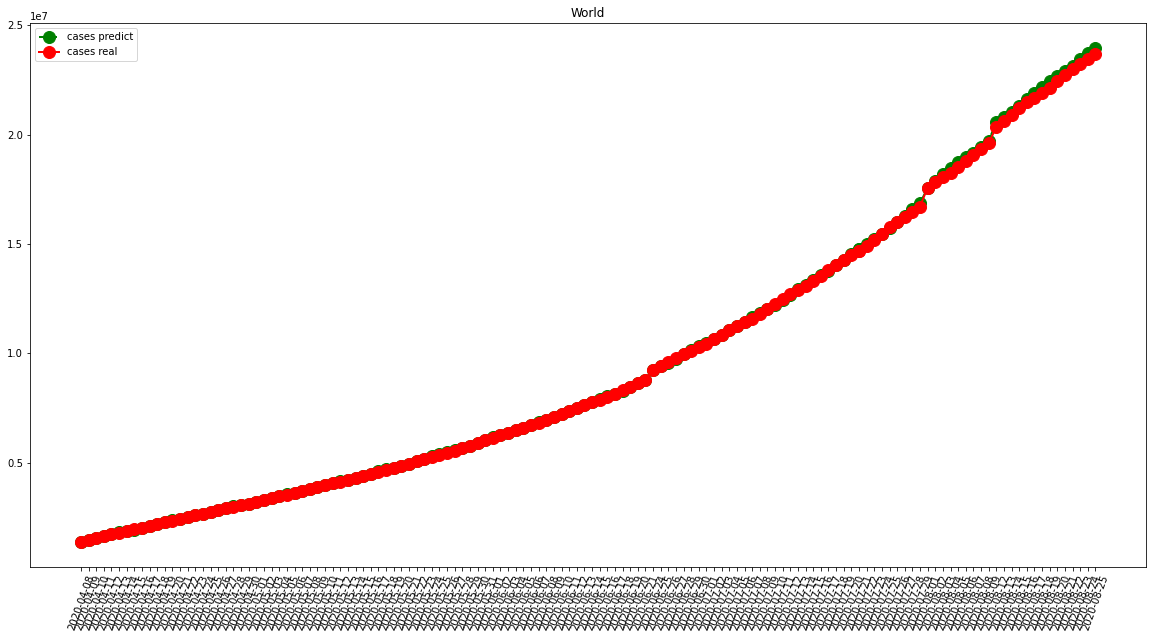

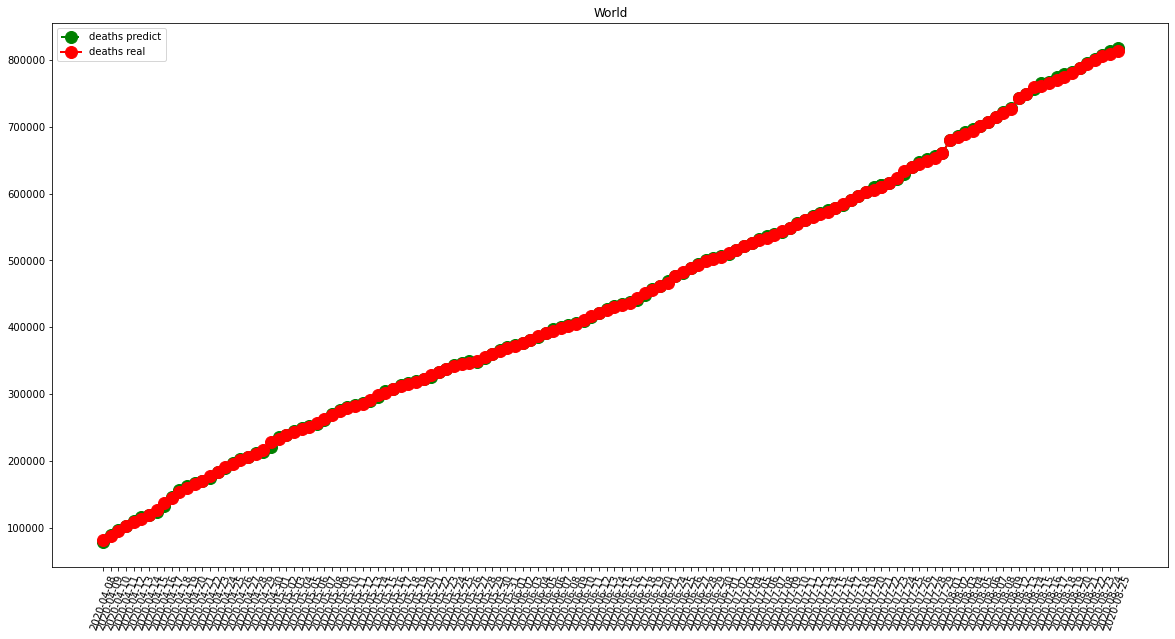

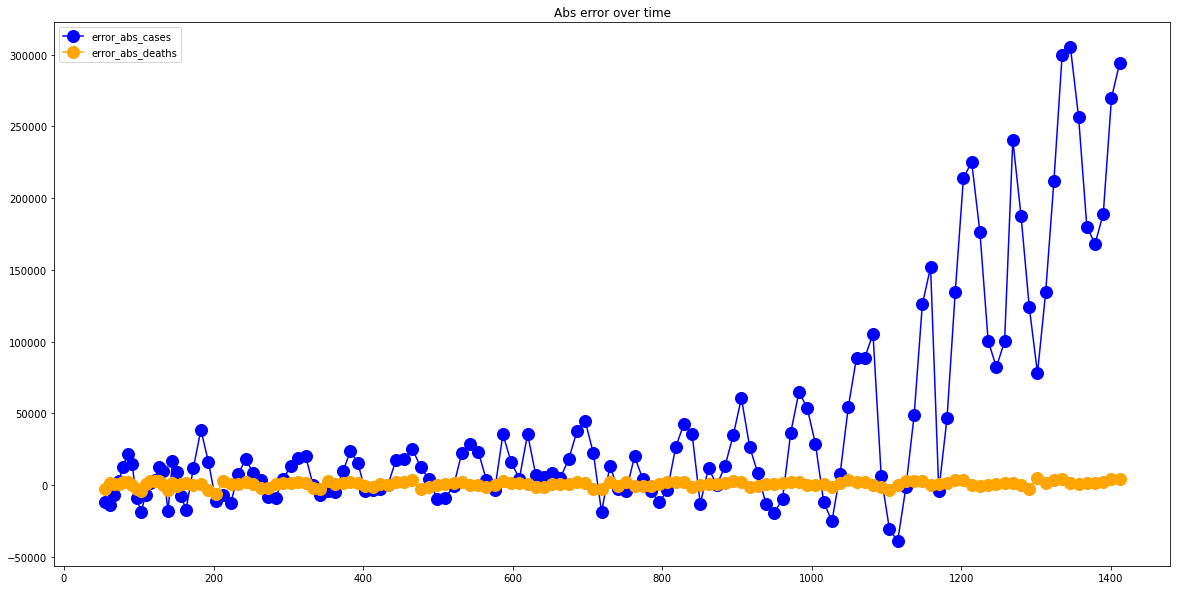

In [7]:
visShow("World")

-- France performances for cases --
MAE =  923.1724137931035
RMSE =  1399.916667470628
-- France performances for deaths --
MAE =  127.87586206896552
RMSE =  278.4970005410199


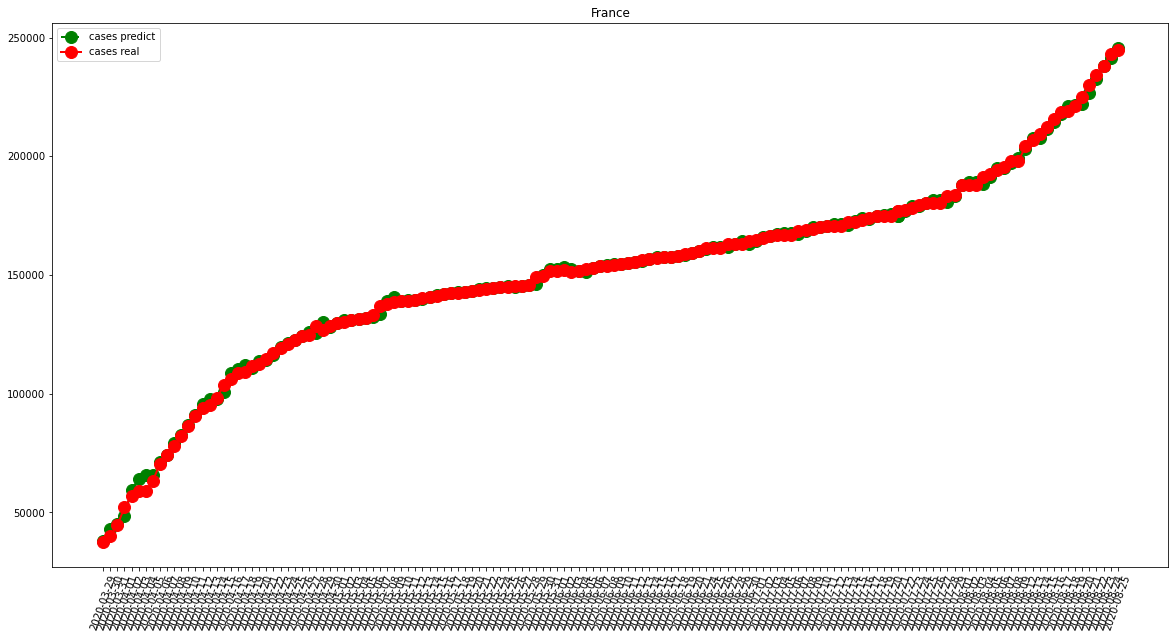

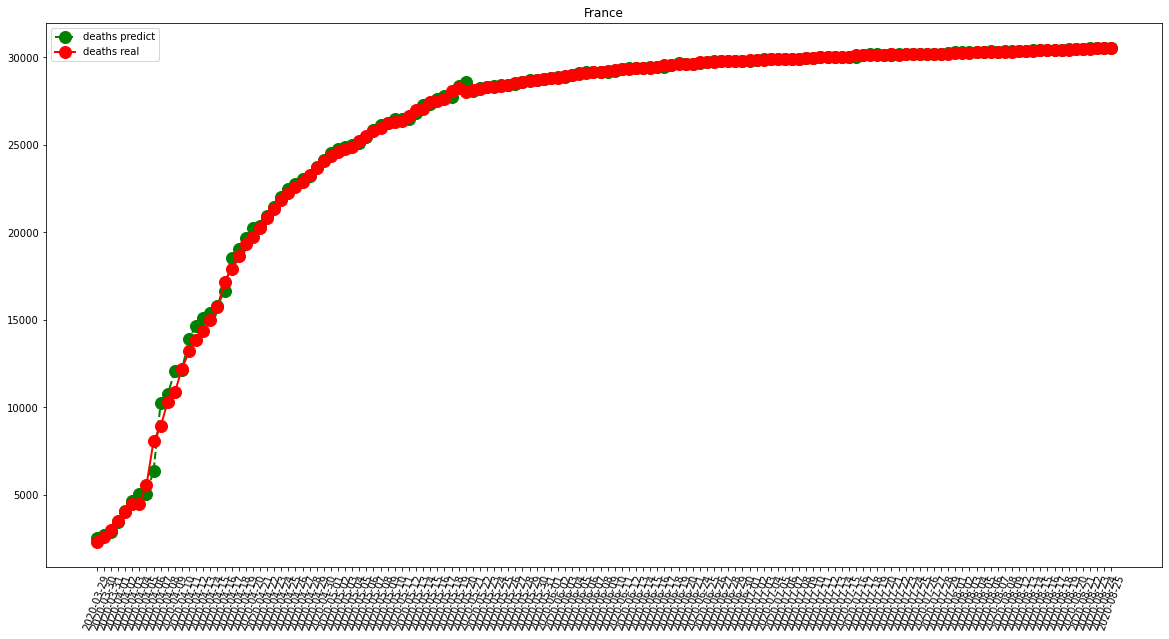

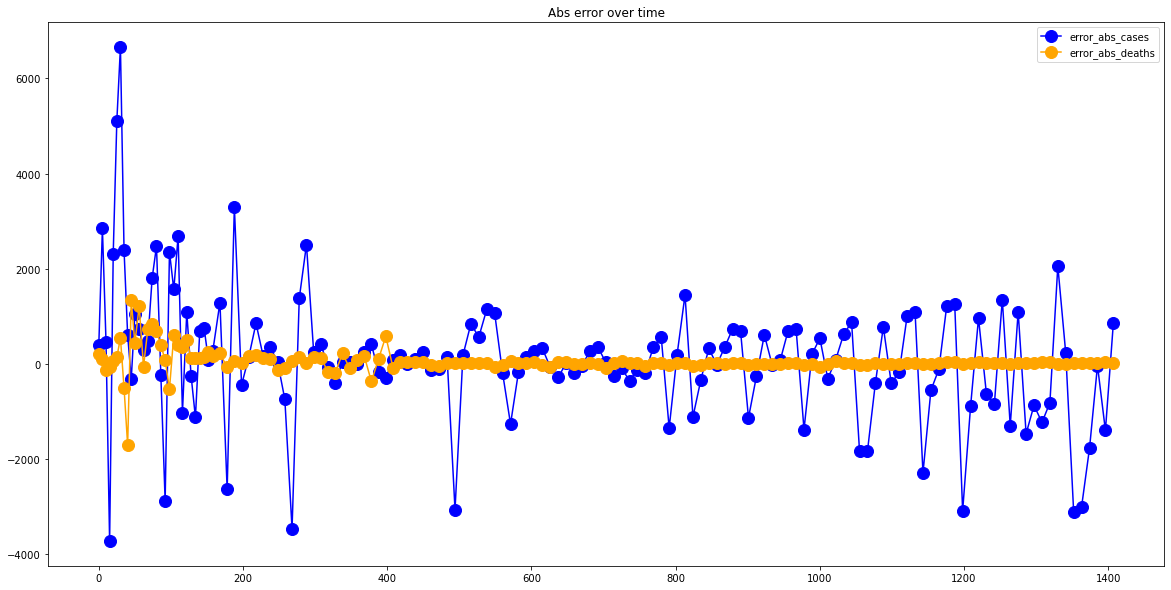

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.26206896551724
RMSE =  460.41410146474254
-- Italy performances for deaths --
MAE =  75.80689655172414
RMSE =  246.47492703147802


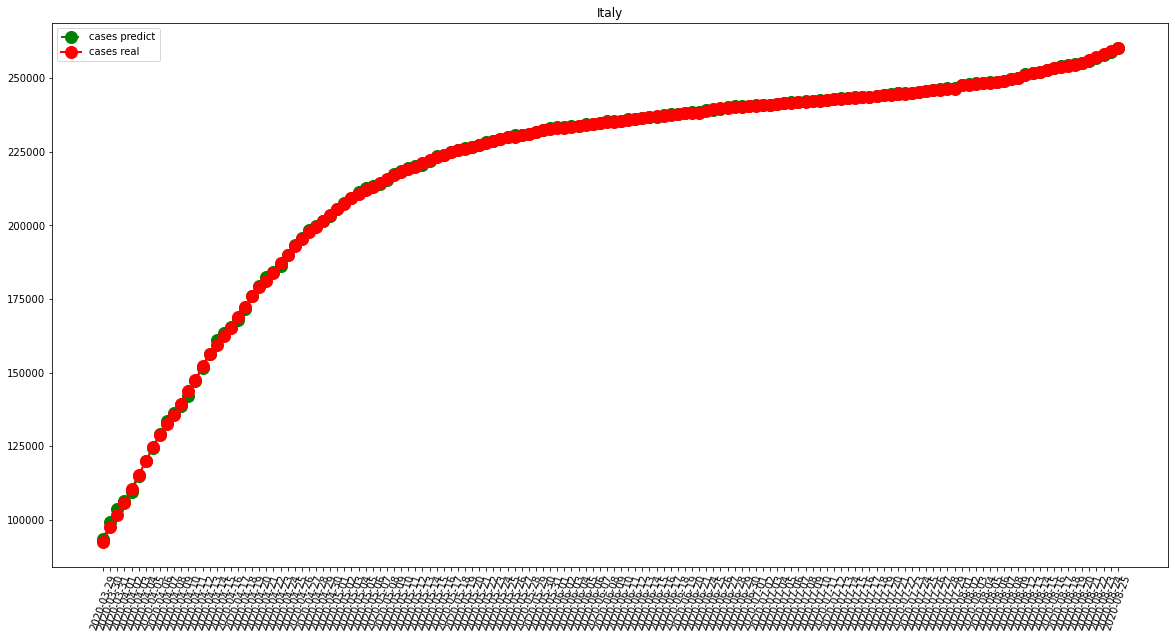

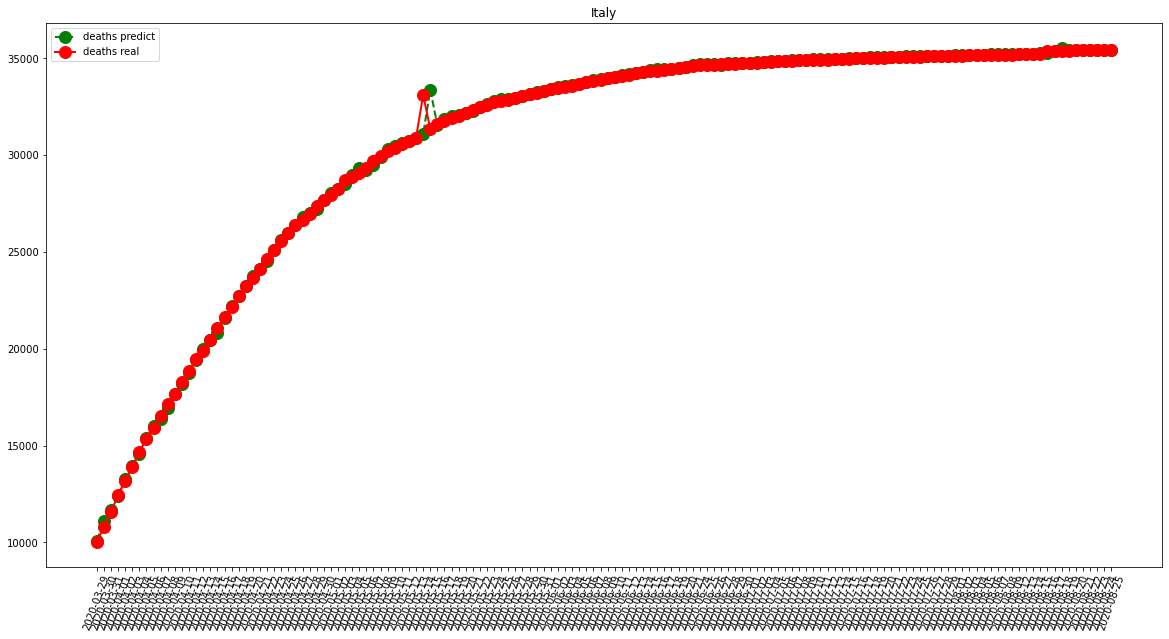

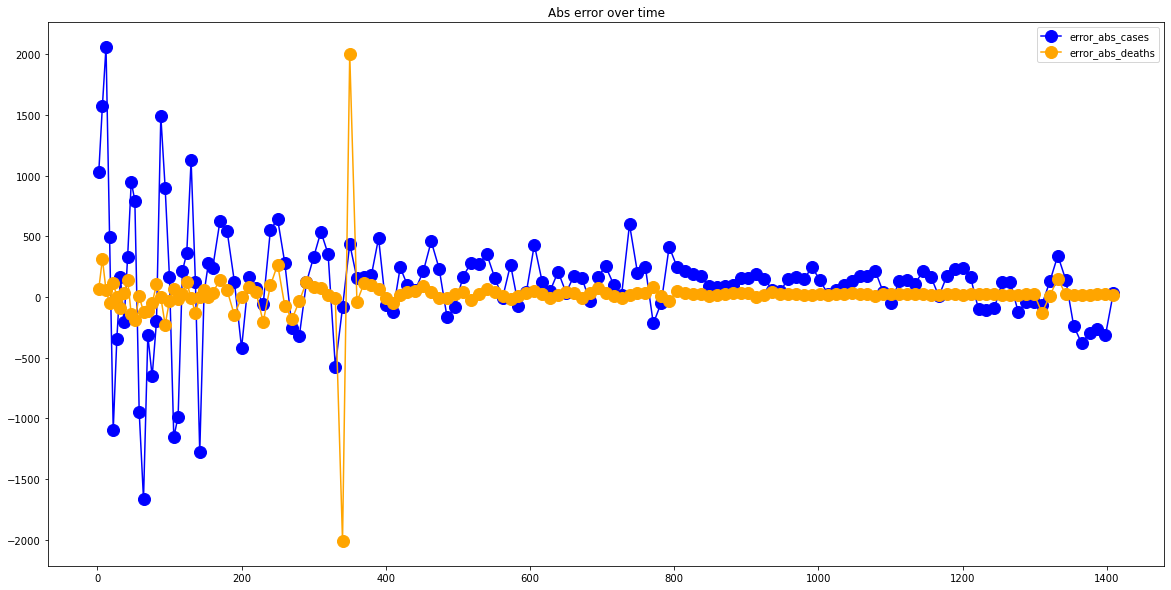

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1659.8896551724138
RMSE =  3268.0040243929134
-- Spain performances for deaths --
MAE =  130.8896551724138
RMSE =  337.36797673184384


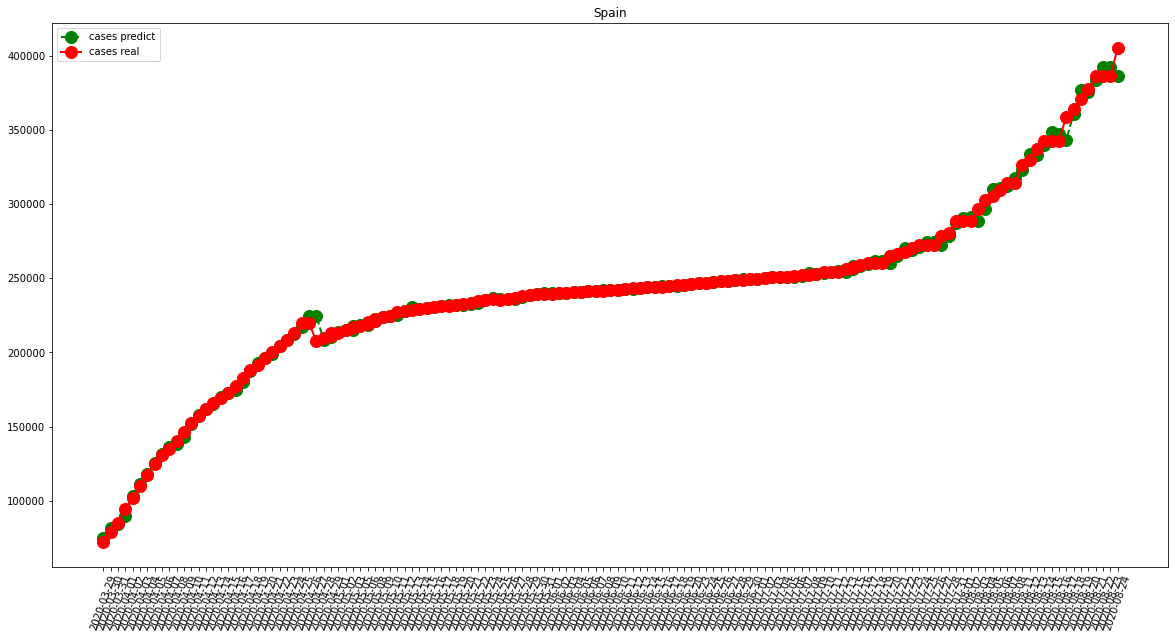

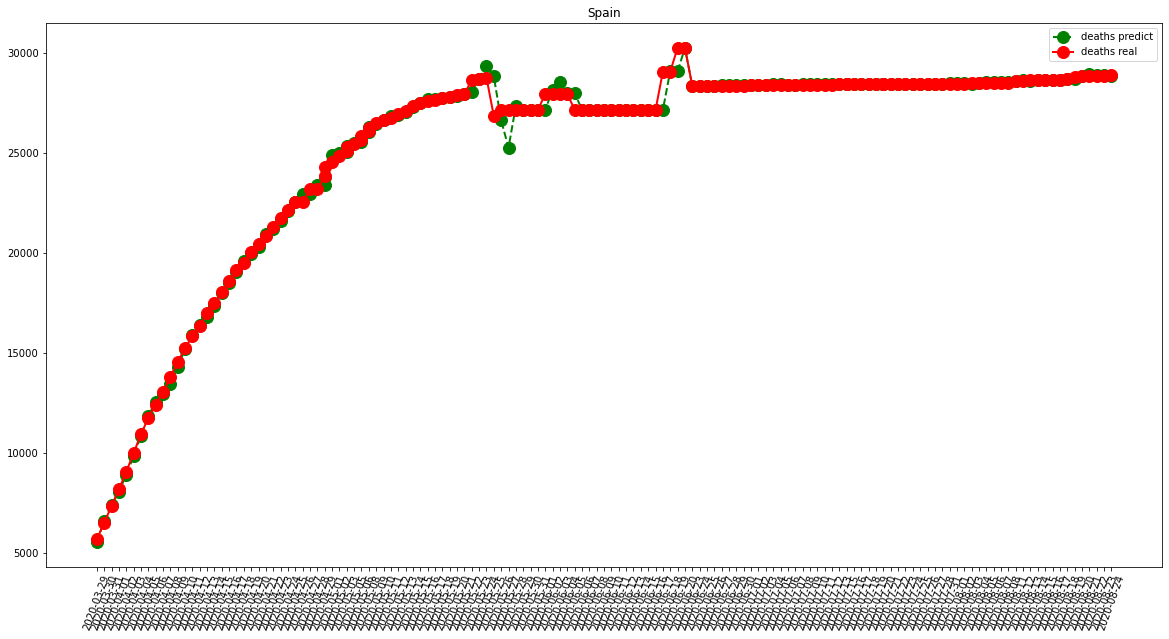

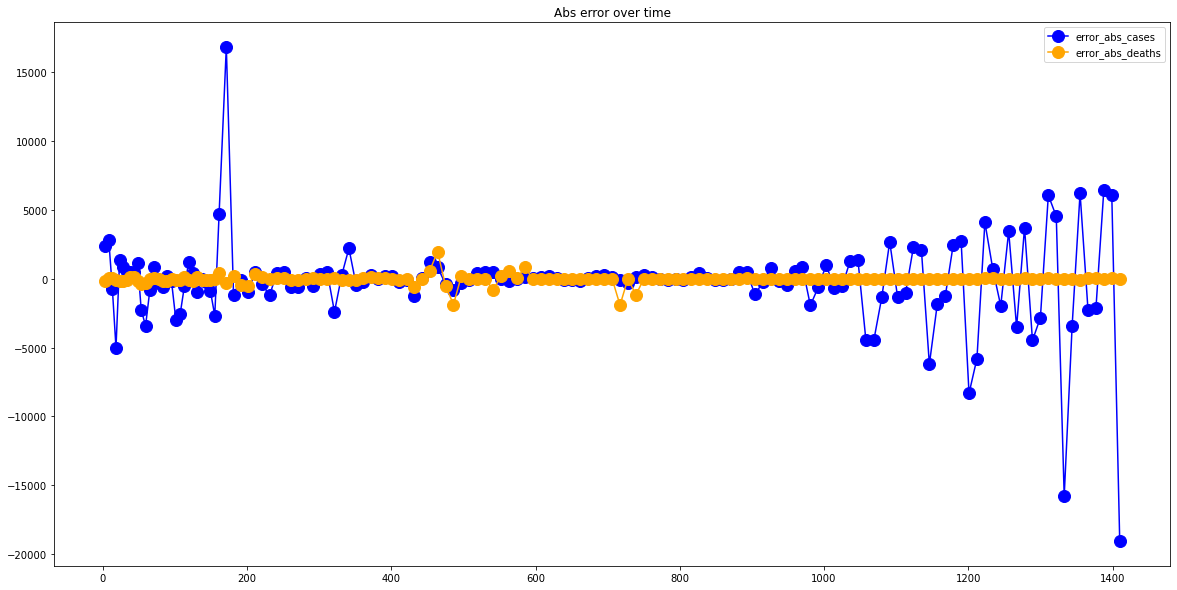

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  10525.779310344828
RMSE =  16657.061727894765
-- United States performances for deaths --
MAE =  494.53793103448277
RMSE =  701.527564774137


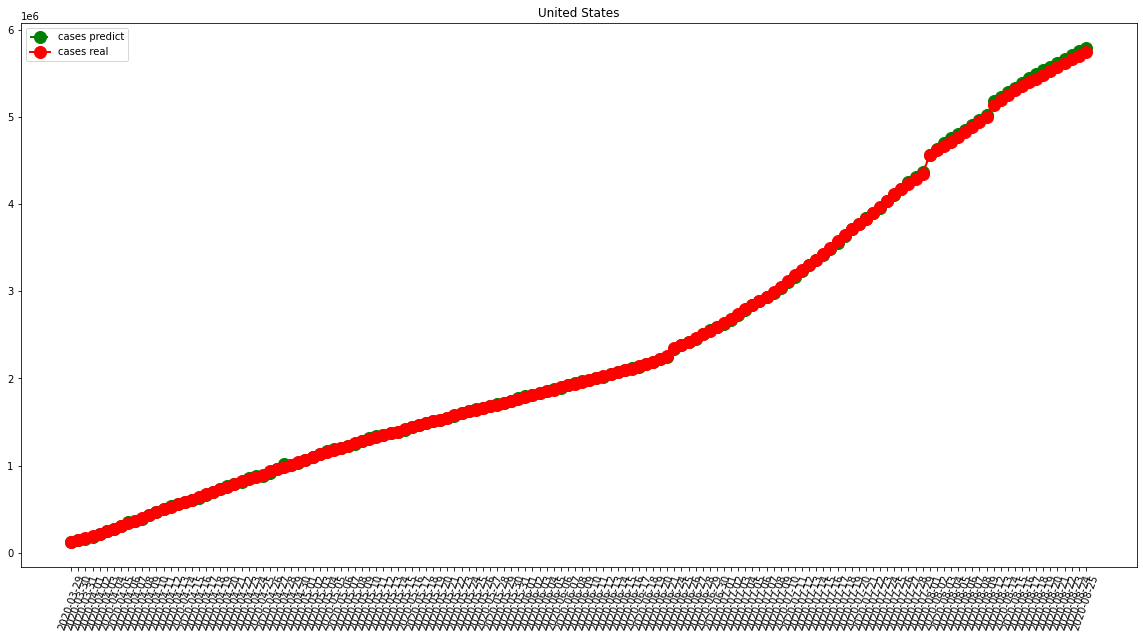

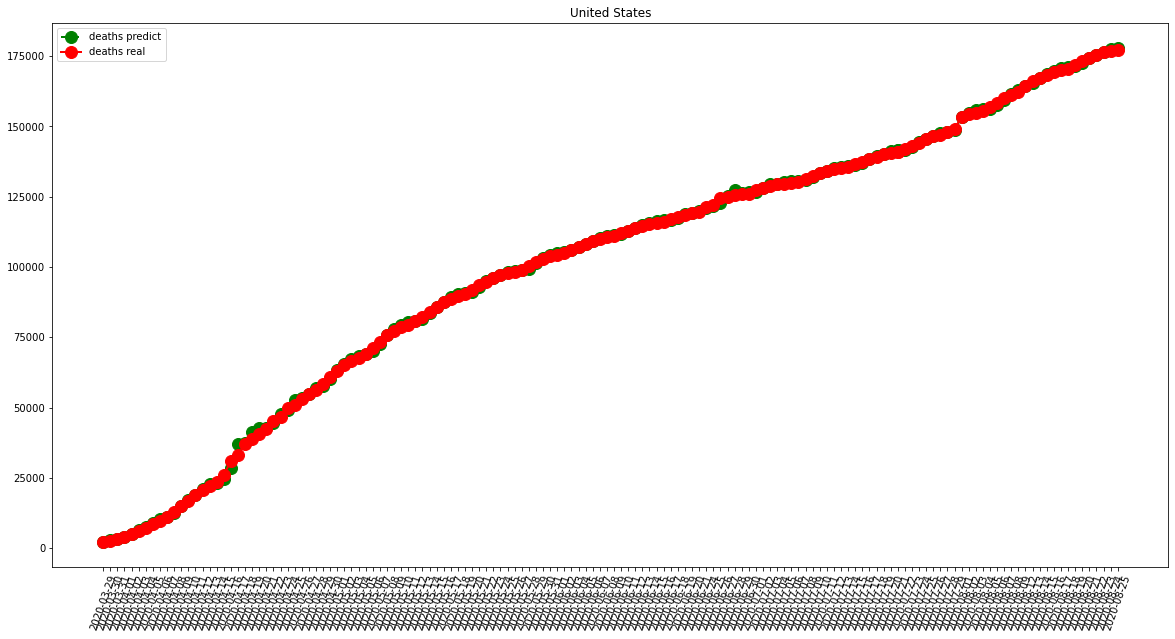

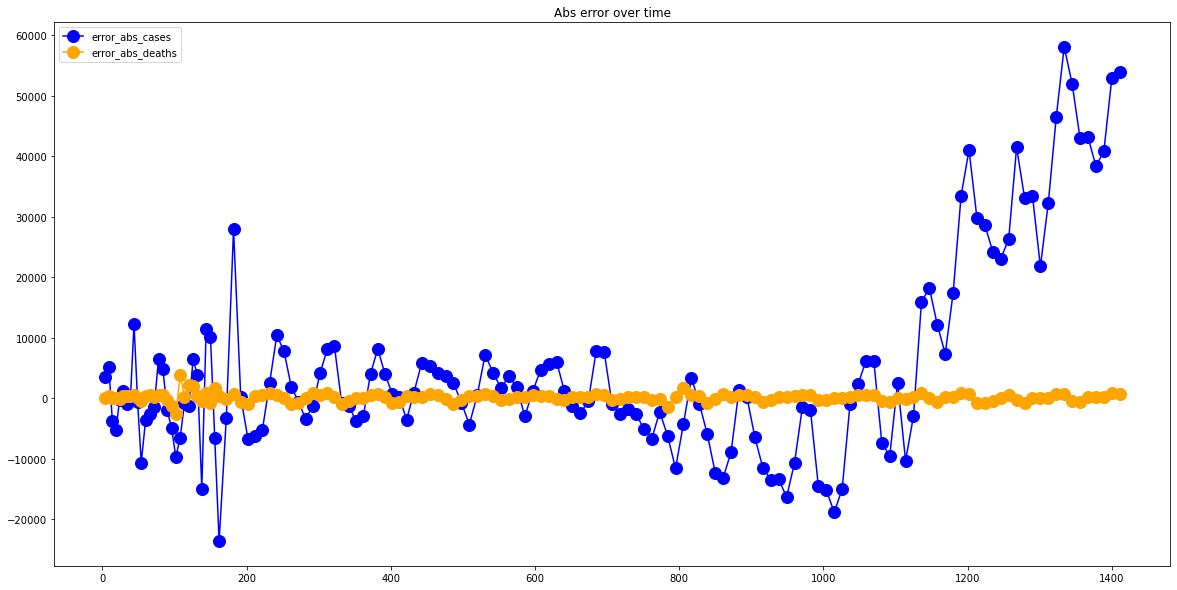

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  68.69655172413793
RMSE =  99.07444083912968
-- China performances for deaths --
MAE =  28.53103448275862
RMSE =  130.3956578502785


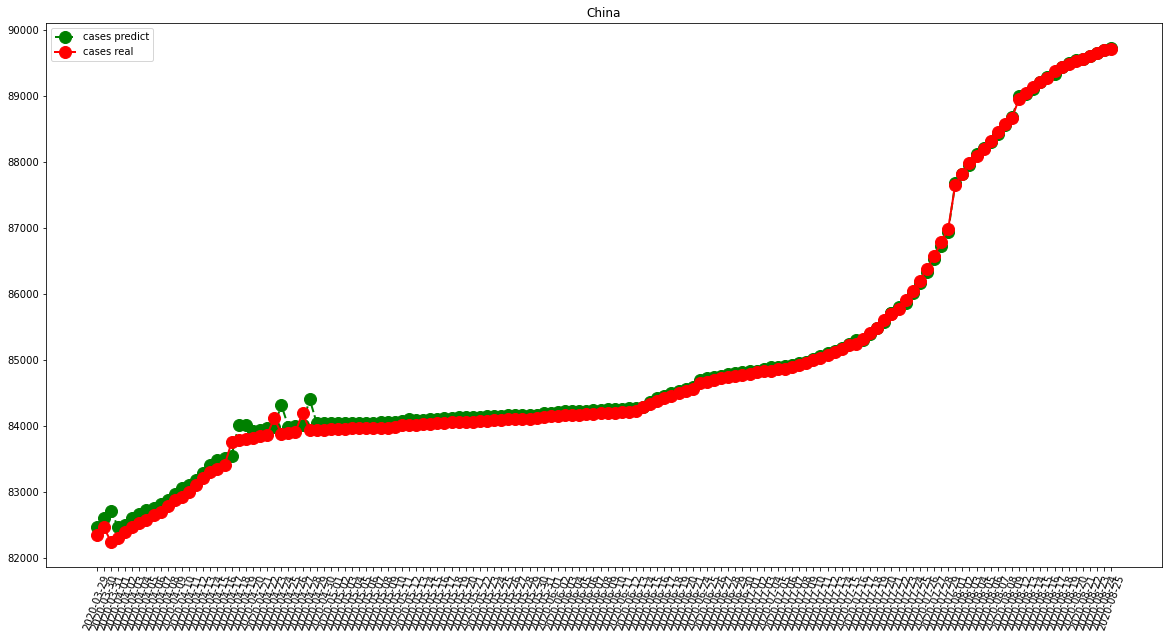

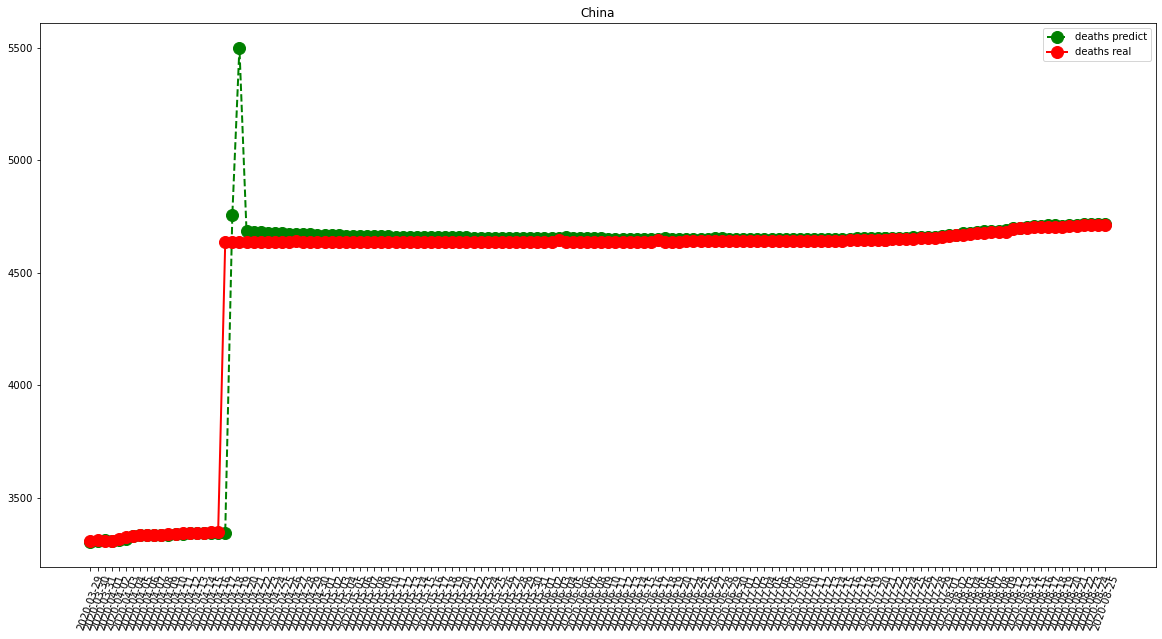

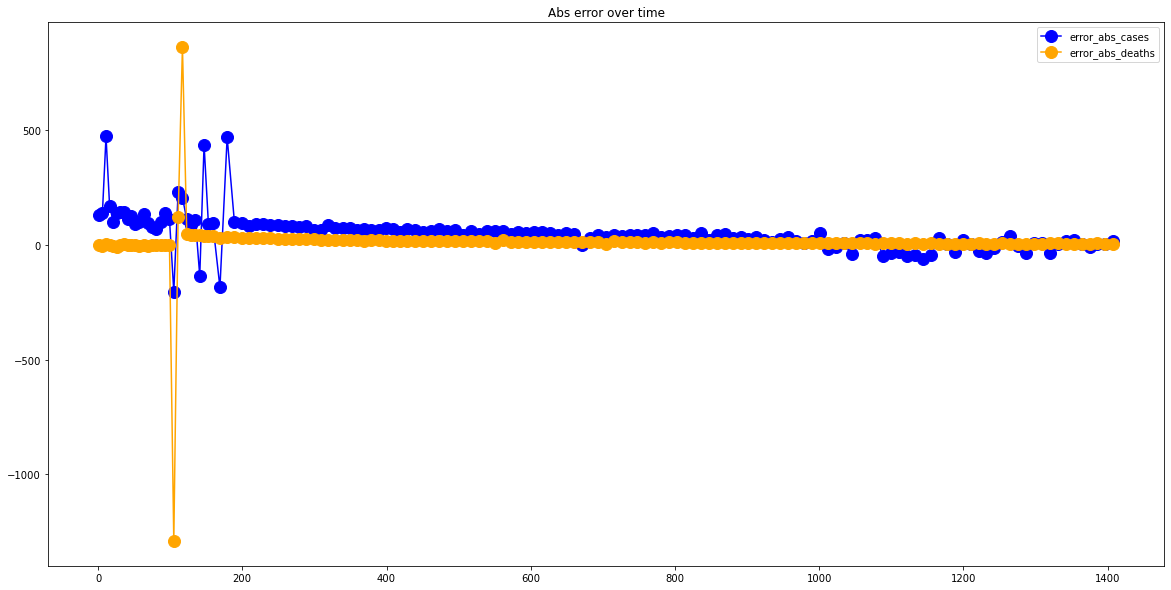

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1110.957264957265
RMSE =  3865.1872523496836
-- United Kingdom performances for deaths --
MAE =  256.35042735042737
RMSE =  788.9303967652476


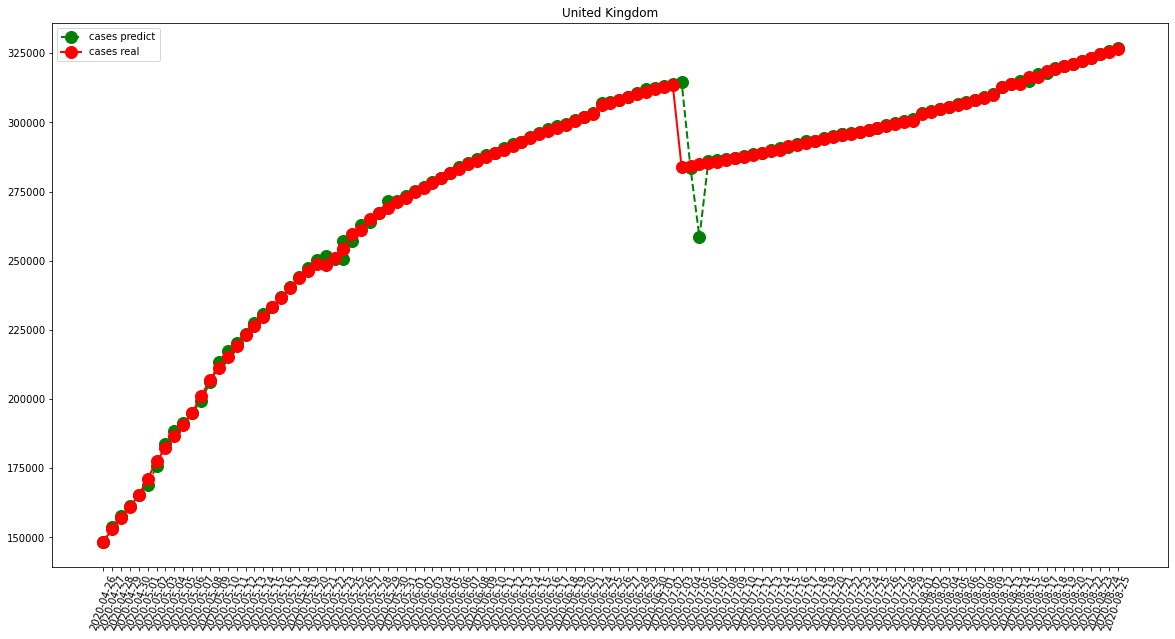

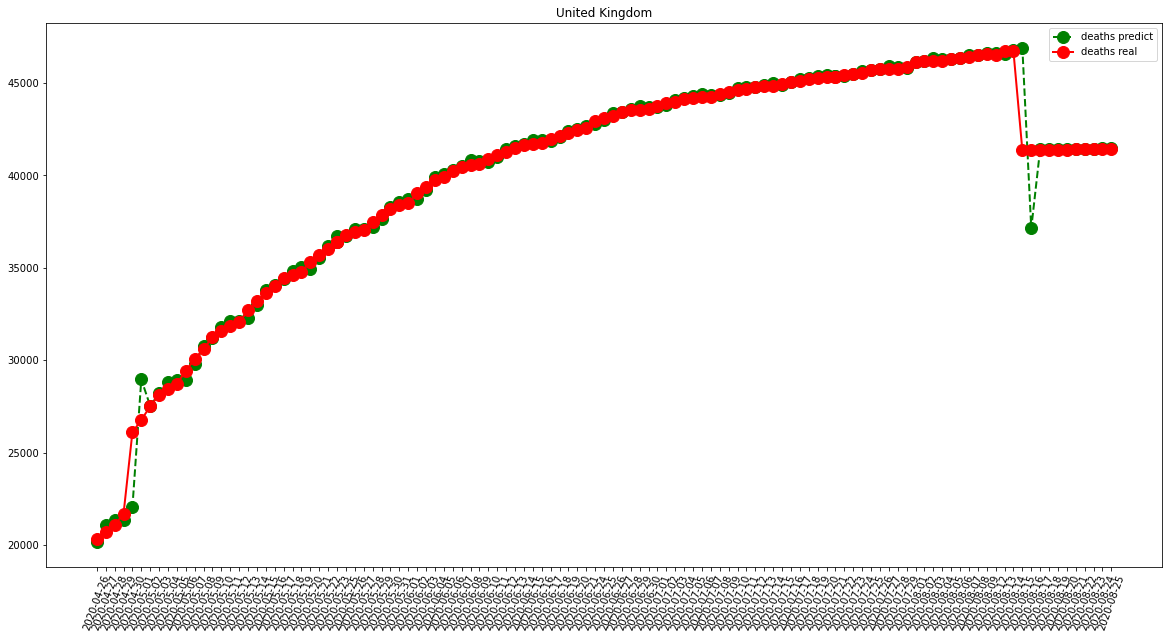

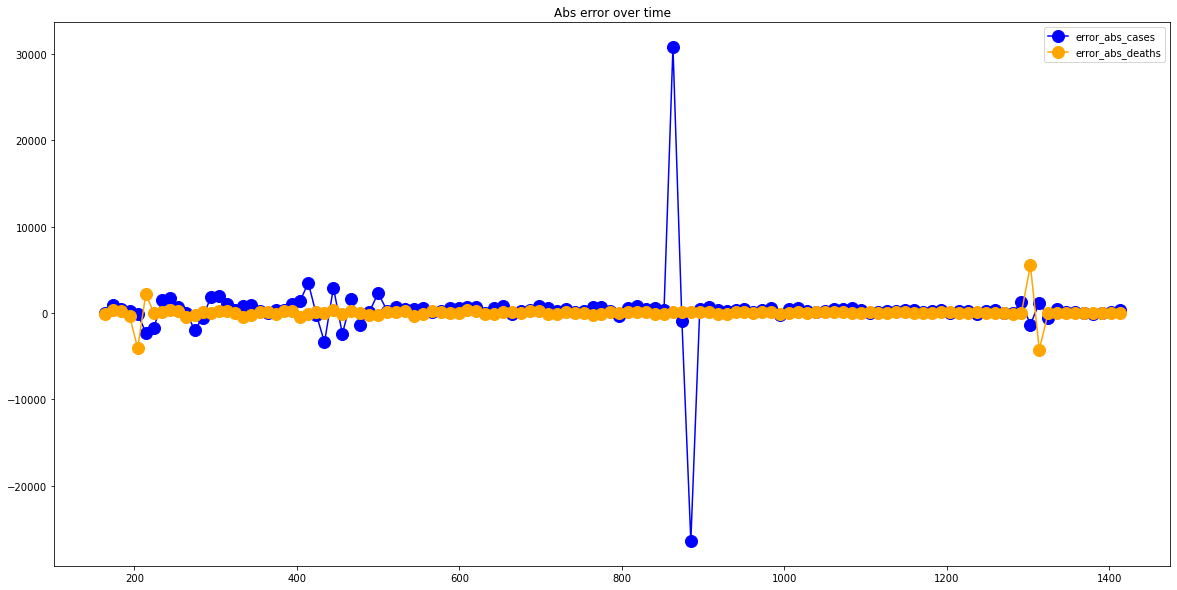

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  395.54700854700855
RMSE =  586.7306856095882
-- Germany performances for deaths --
MAE =  21.957264957264957
RMSE =  40.60240824822532


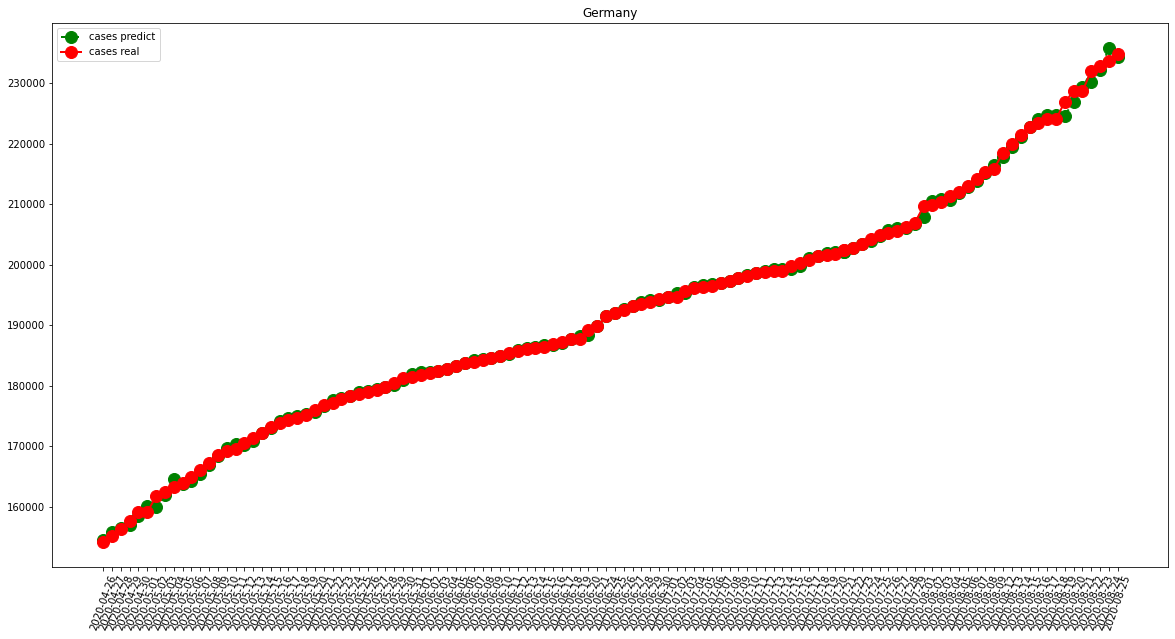

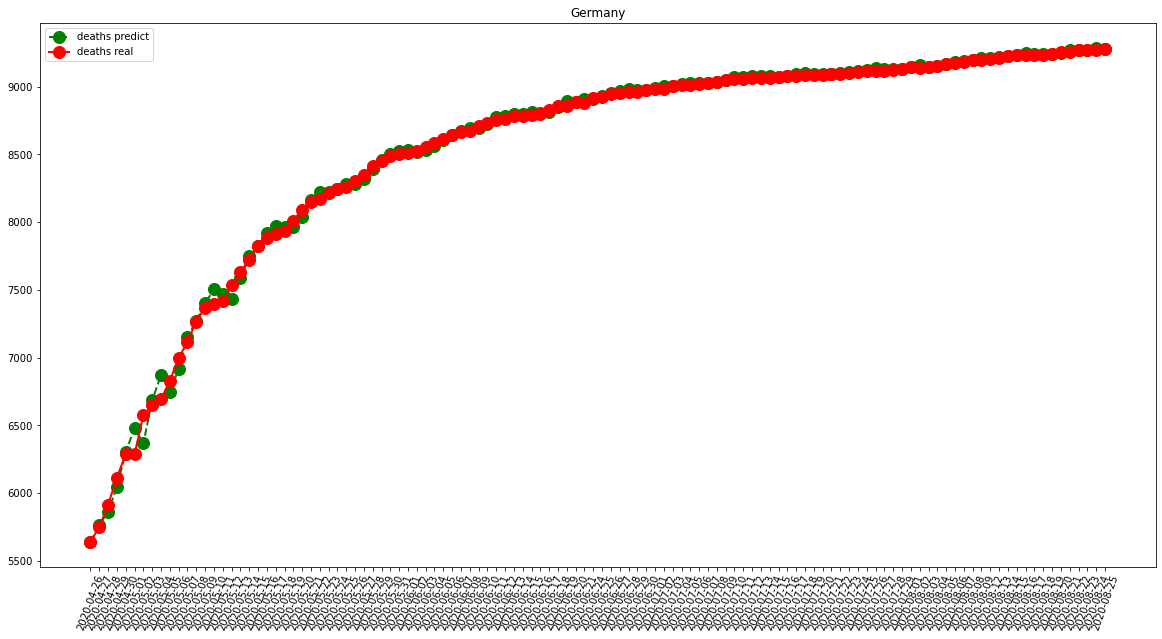

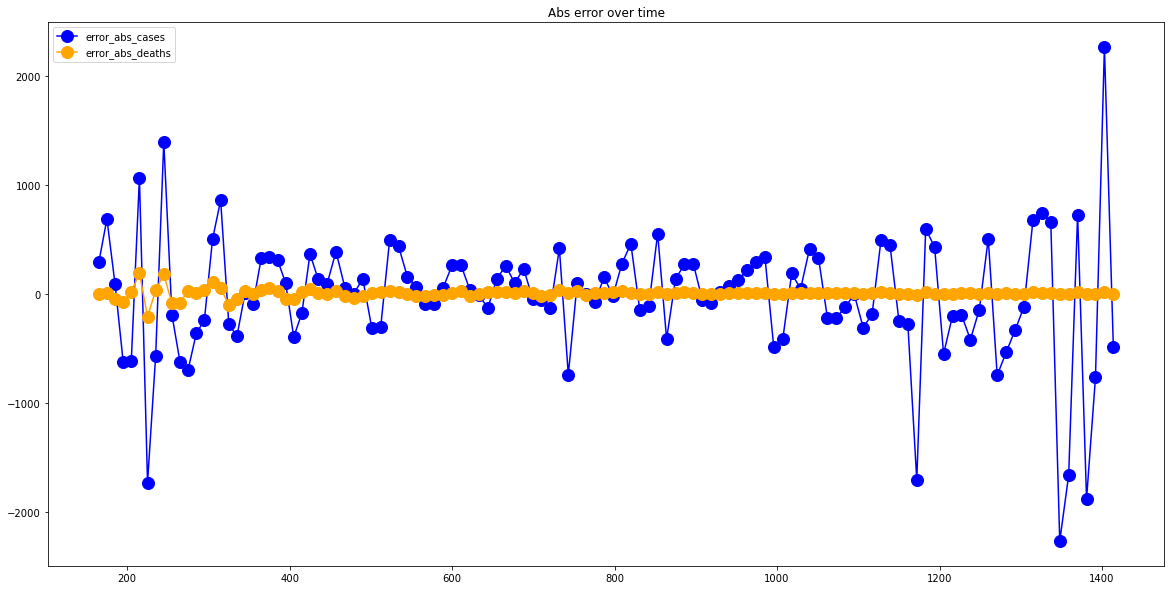

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  728.5897435897435
RMSE =  1089.0976230249667
-- Iran performances for deaths --
MAE =  40.02564102564103
RMSE =  78.15298387706568


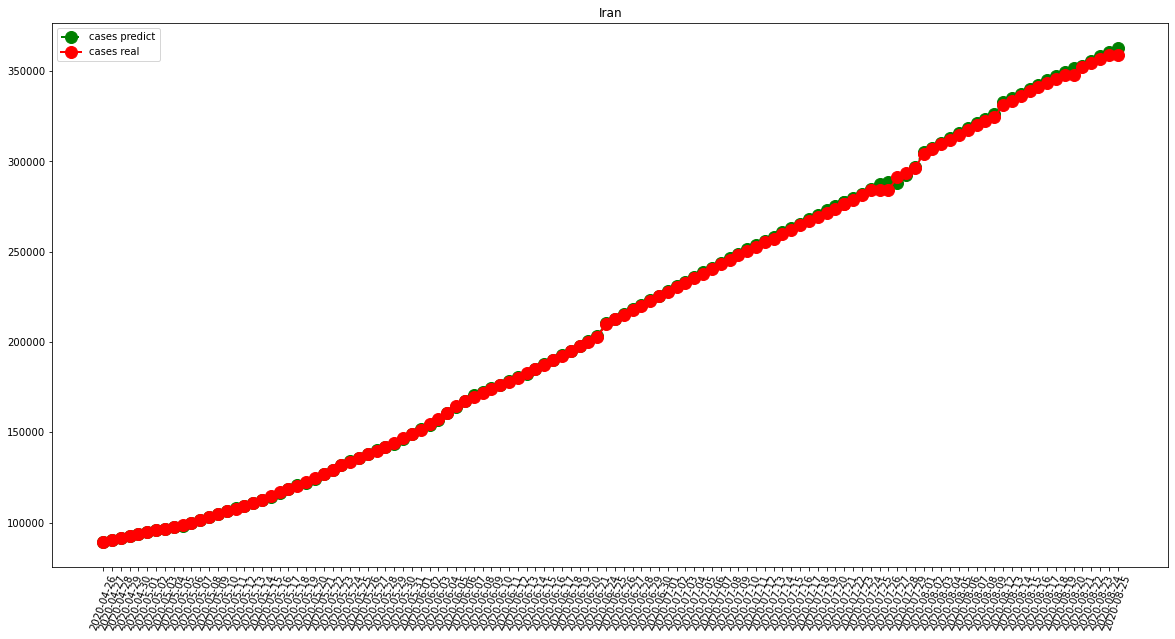

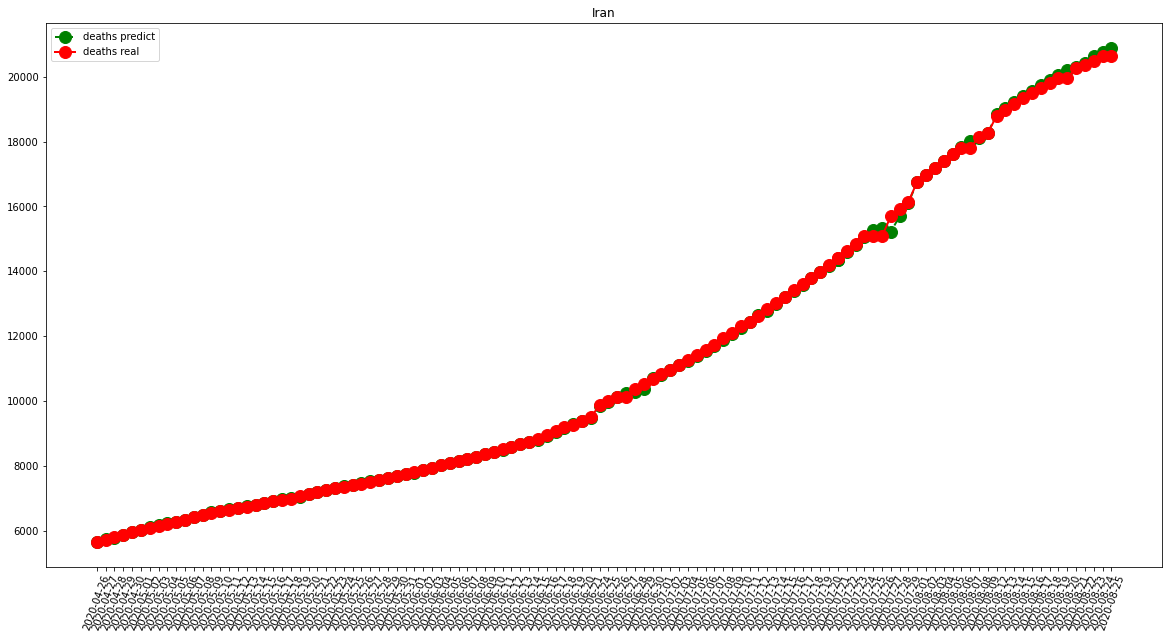

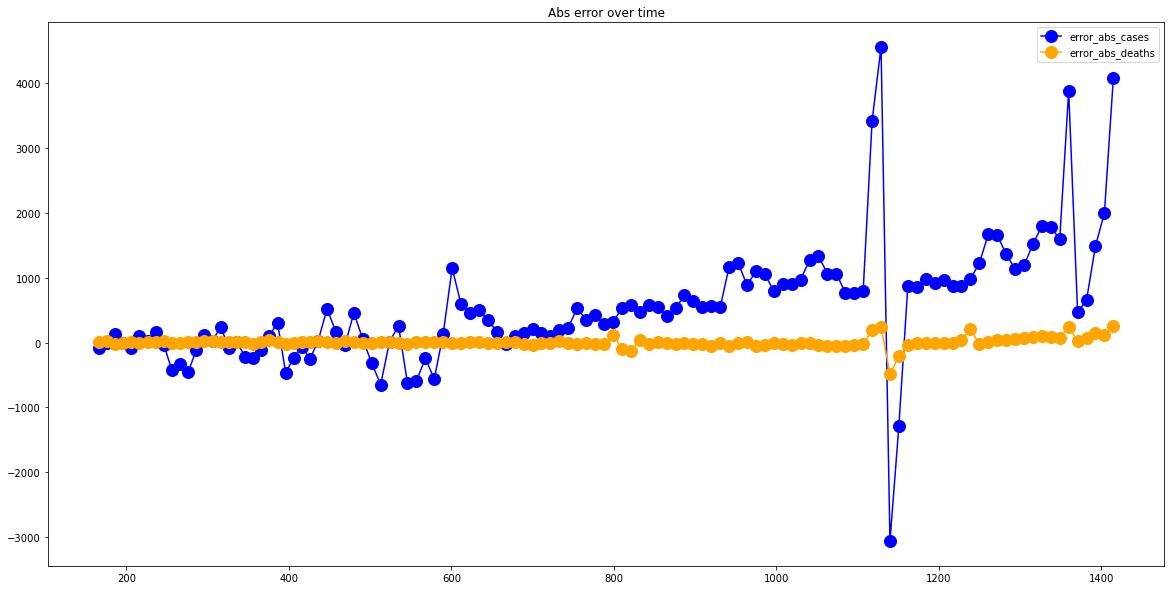

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.7948717948718
RMSE =  326.9801609288026
-- Turkey performances for deaths --
MAE =  16.632478632478634
RMSE =  93.85604543638766


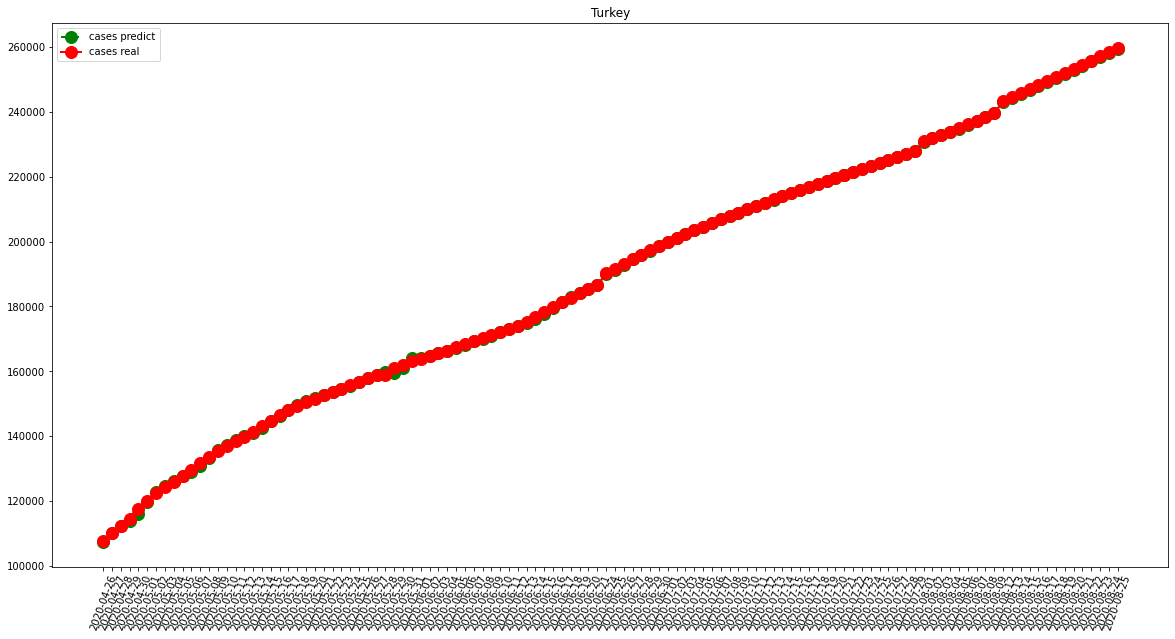

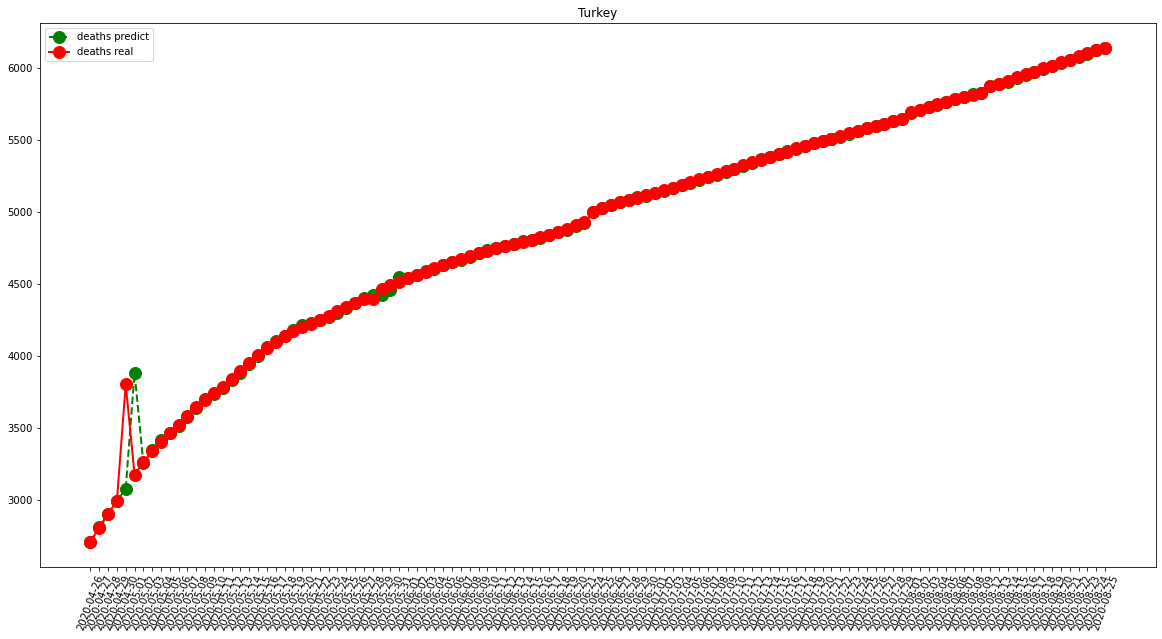

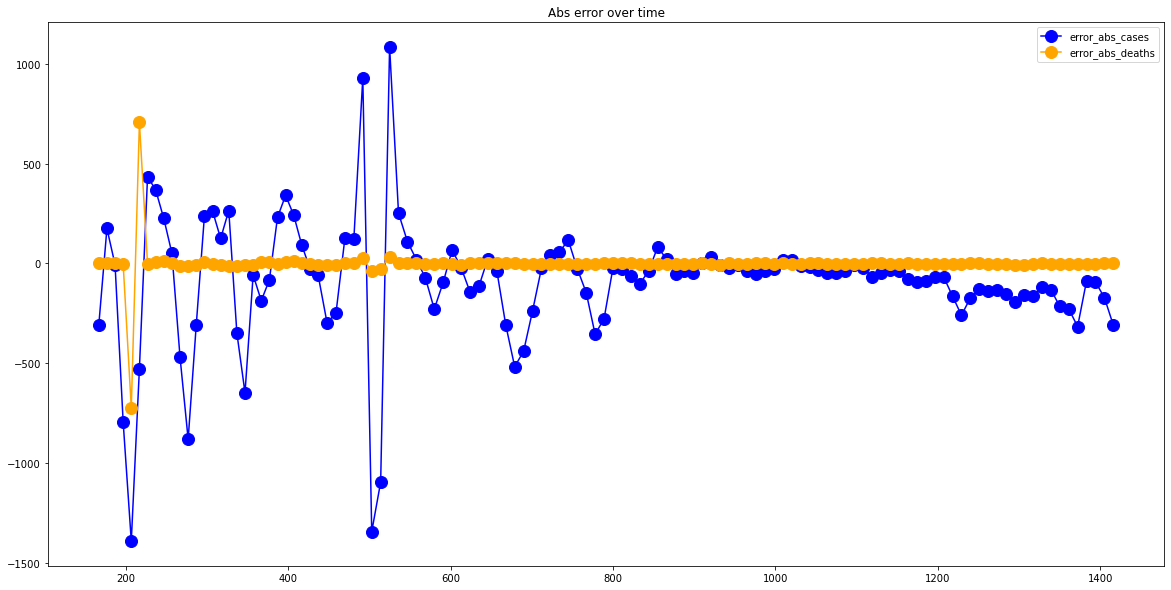

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13471.8
RMSE =  18138.817048896362
-- Brazil performances for deaths --
MAE =  422.0888888888889
RMSE =  520.2428706329808


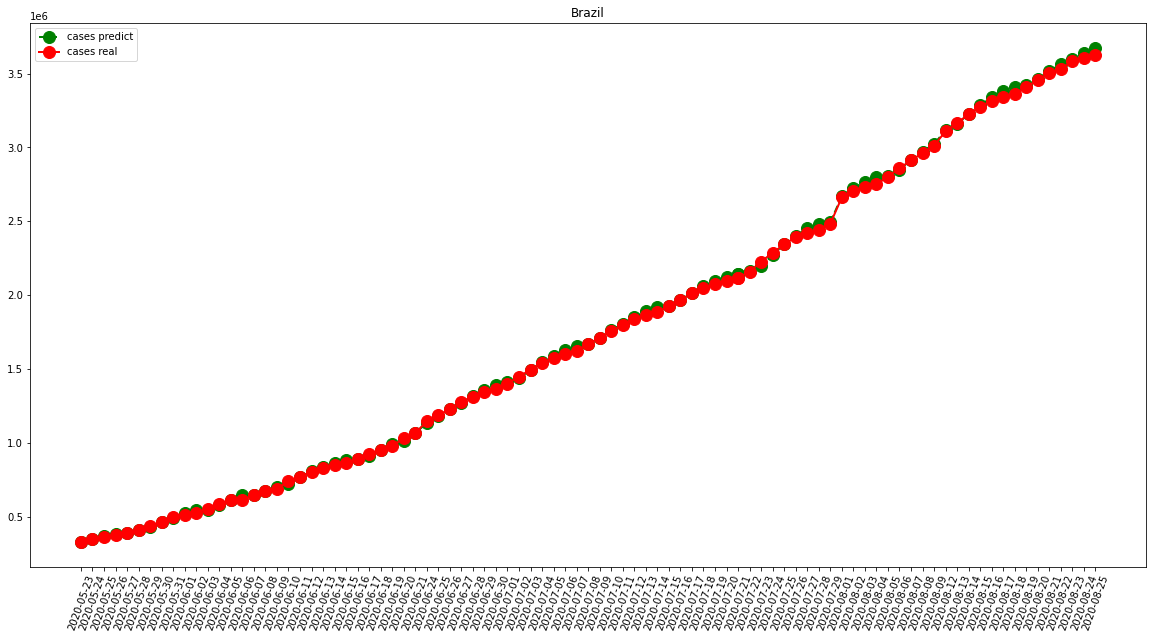

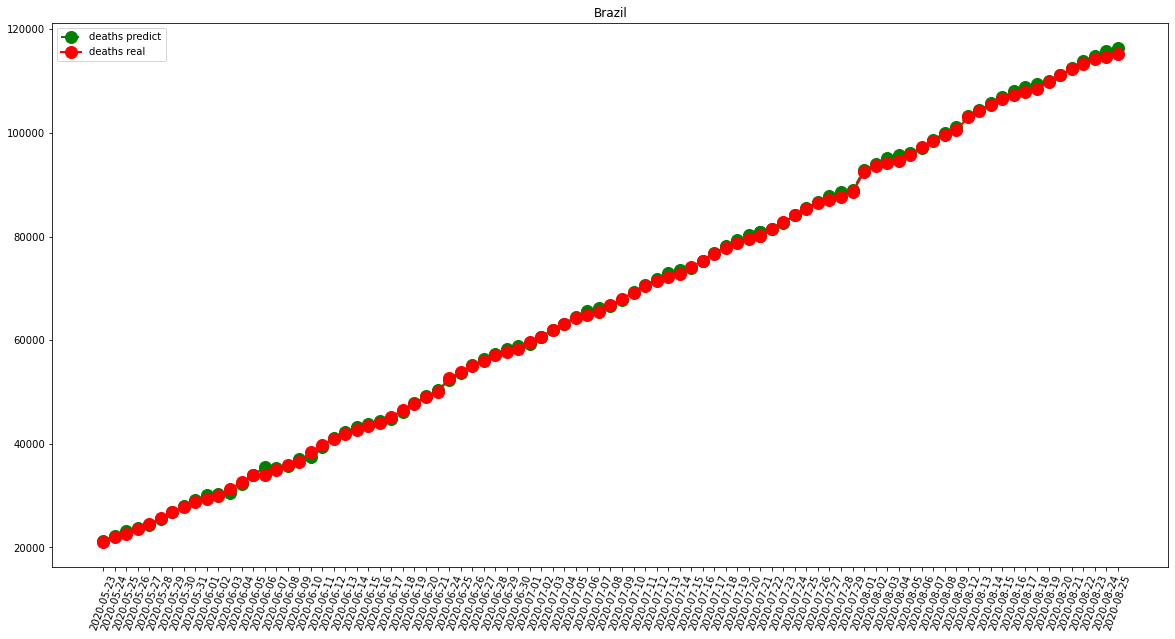

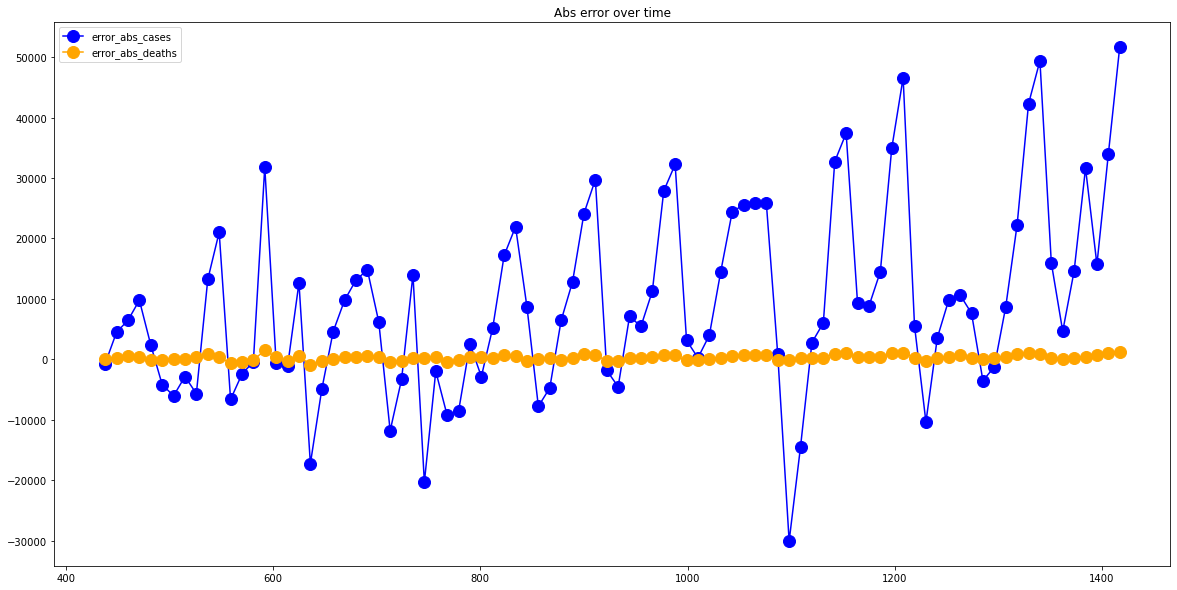

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)